In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

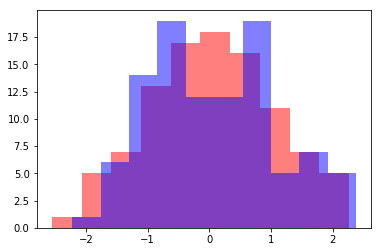

In [65]:
dis1 = np.random.randn(100,1) ;  dis2 = np.random.randn(100,1) 
plt.hist(dis1,color='Red',alpha=0.5) ; plt.hist(dis2,color='Blue',alpha=0.5) ; plt.show()

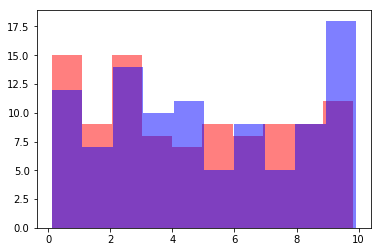

[[9.61936379 2.92147527 2.4082878 ]] [[3.92675677 9.56405723 1.87130892]]


In [66]:
dis1 = np.random.uniform(low=0,high=10,size=(100,1)) ;  dis2 = np.random.uniform(low=0,high=10,size=(100,1))
plt.hist(dis1,color='Red',alpha=0.5) ; plt.hist(dis2,color='Blue',alpha=0.5) ; plt.show()
print(dis1[:3].T,dis2[:3].T)

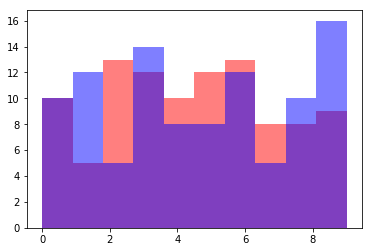

[7 8 2] [6 8 6]


In [67]:
elements      = [0,1,2,3,4,5,6,7,8,9,10]
probabilities = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0]
dis1 = np.random.choice(elements, 100, p=probabilities) ; dis2 = np.random.choice(elements, 100, p=probabilities)
plt.hist(dis1,color='Red',alpha=0.5); plt.hist(dis2,color='Blue',alpha=0.5) ; plt.show()
print(dis1[:3].T,dis2[:3].T)

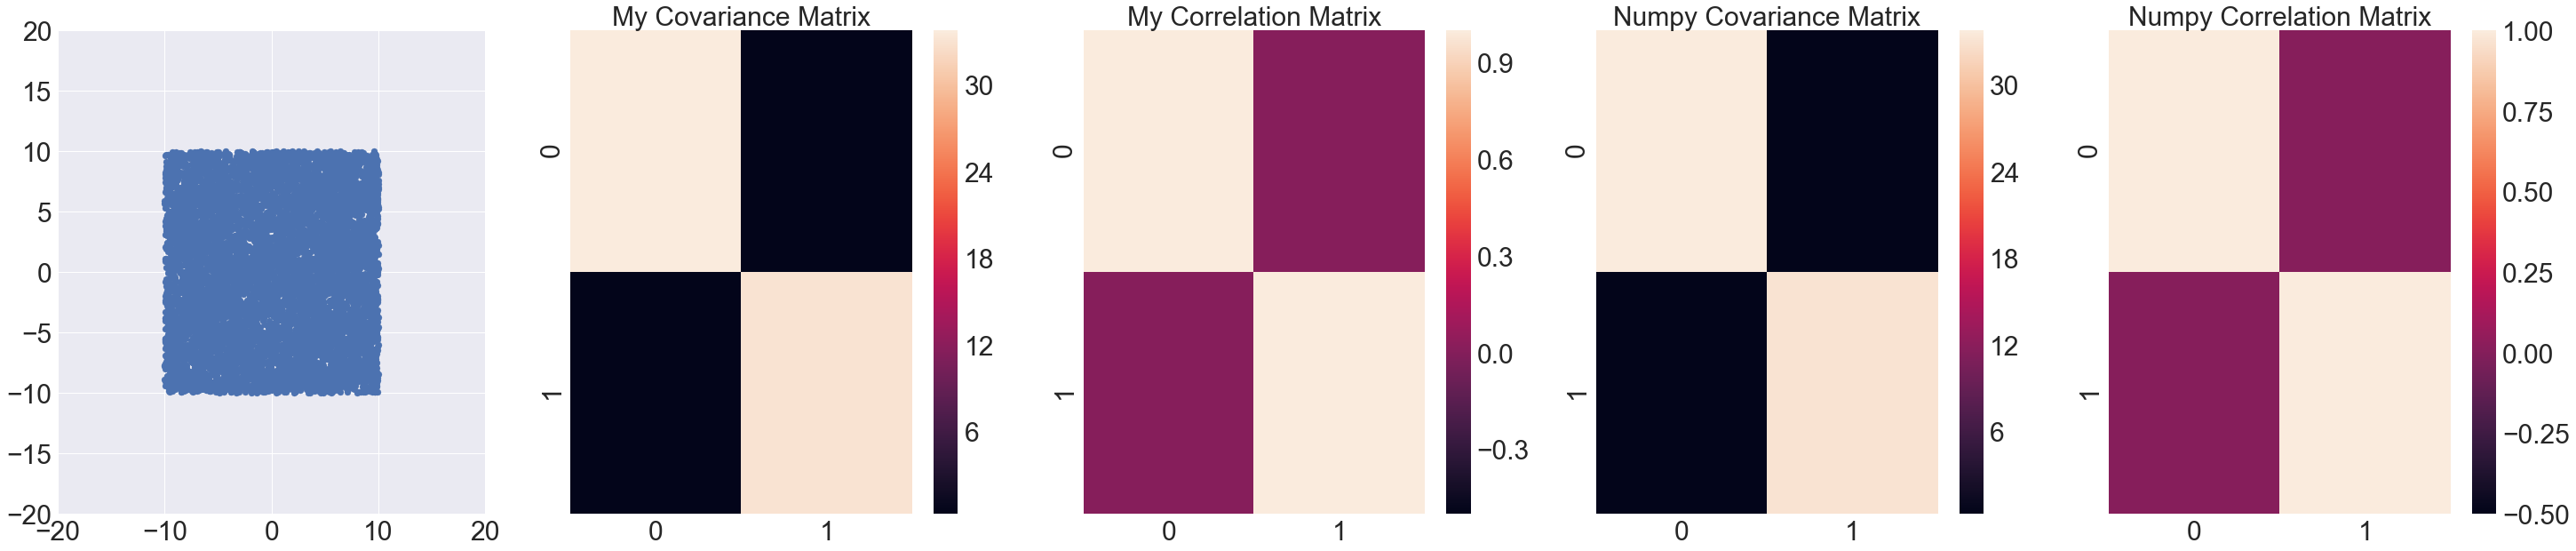

In [232]:
dis1 = np.random.uniform(low=-10,high=10,size=(9000,1)) ;  dis2 = np.random.uniform(low=-10,high=10,size=(9000,1))
plt.figure(figsize=(50,10))

plt.subplot(151); plt.xlim(-20,20);plt.ylim(-20,20); plt.scatter(dis1,dis2)

dis_all = np.hstack((dis1,dis2))
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])

sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap( correlation_mat,vmin=-0.5); plt.title('My Correlation Matrix',fontsize=30);

dis_all = np.hstack((dis1,dis2))
plt.subplot(154); sns.heatmap(np.cov(dis_all.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(dis_all.T) ,vmin=-0.5); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

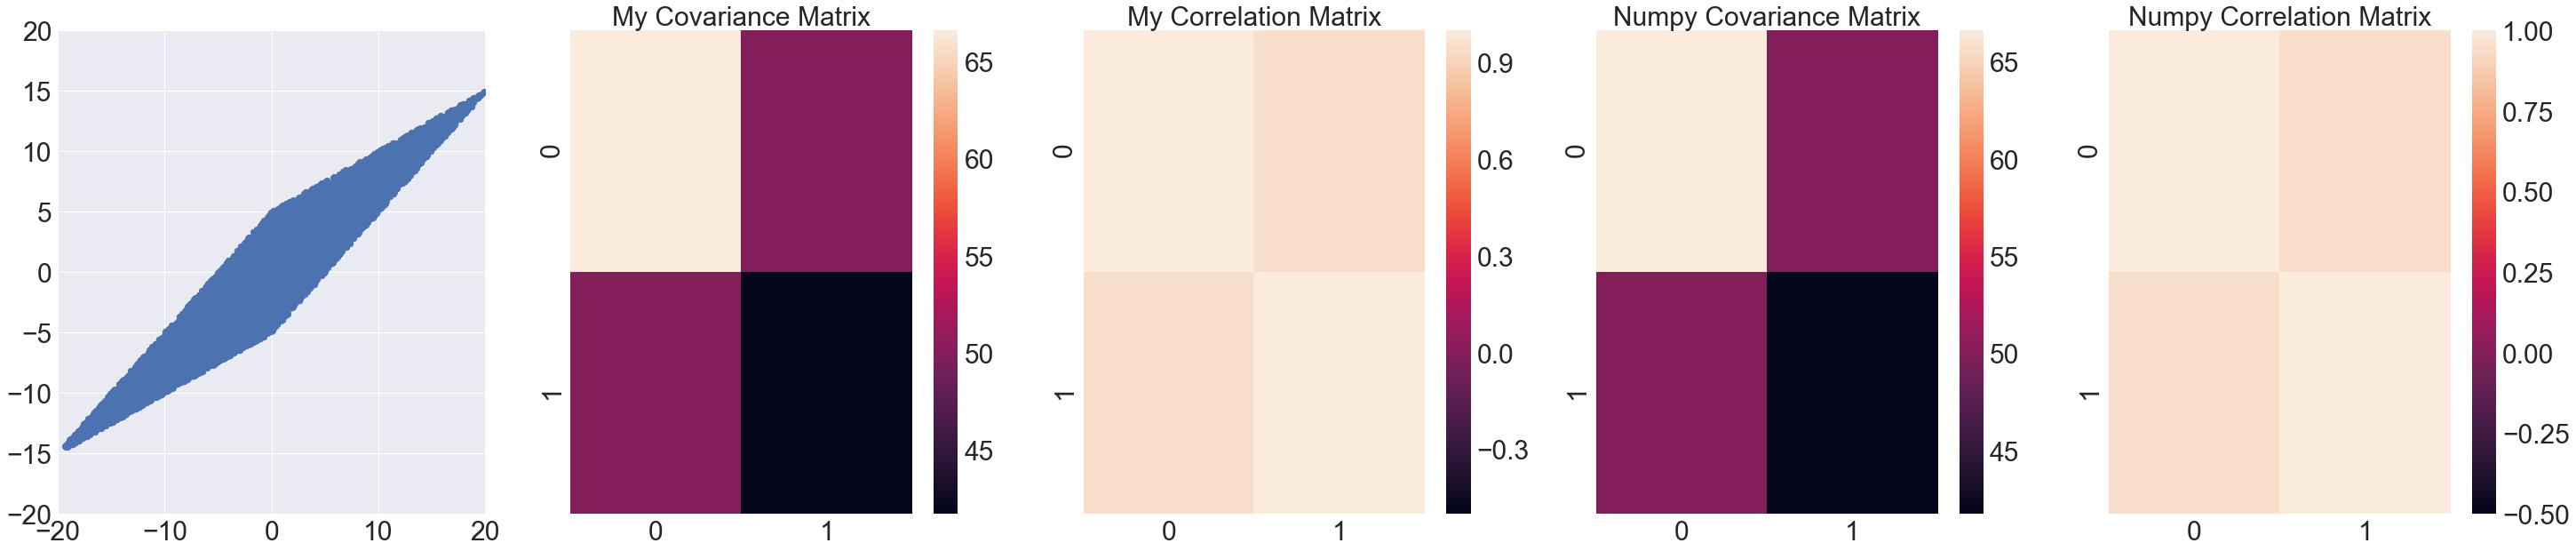

In [222]:
dis_all = np.hstack((dis1,dis2))
mix_matrix = np.array([
    [1,0.5],
    [1,1]
])
dis_mixed = dis_all @ mix_matrix

plt.figure(figsize=(50,10))
plt.subplot(151); plt.xlim(-20,20);plt.ylim(-20,20); plt.scatter(dis_mixed[:,0],dis_mixed[:,1])

dis_all = dis_mixed
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])
sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

dis_all = np.hstack((dis1,dis2))
dis_mixed = dis_all @ mix_matrix
plt.subplot(154); sns.heatmap(np.cov(dis_mixed.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(dis_mixed.T),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

In [342]:


def _exp(x):
    exp = np.exp(-(x ** 2) / 2)
    gx = x * exp
    g_x = (1 - x ** 2) * exp
    return gx, g_x.mean(axis=0)

def _cube(x):
    return x ** 3, (3 * x ** 2).mean(axis=0)

def _sym_decorrelation(W):
    """ Symmetric decorrelation
    i.e. W <- (W * W.T) ^{-1/2} * W
    """
    s, u = np.linalg.eigh(np.dot(W, W.T))
    # u (resp. s) contains the eigenvectors (resp. square roots of
    # the eigenvalues) of W * W.T
    return np.dot(np.dot(u * (1. / np.sqrt(s)), u.T), W)

dis_all = np.hstack((dis1,dis2))
mix_matrix = np.array([
    [1,0.5],
    [1,1]
])
dis_mixed = dis_all @ mix_matrix

unmixing_matix     = np.random.rand(2,2)
sym_unmixing_matix = _sym_decorrelation(unmixing_matix)
# dis_mixed = (dis_mixed - dis_mixed.mean(0)[None,:])/dis_mixed.std(0)[None,:]



[[ 0.99708908 -0.07624547]
 [-0.07624547 -0.99708908]]


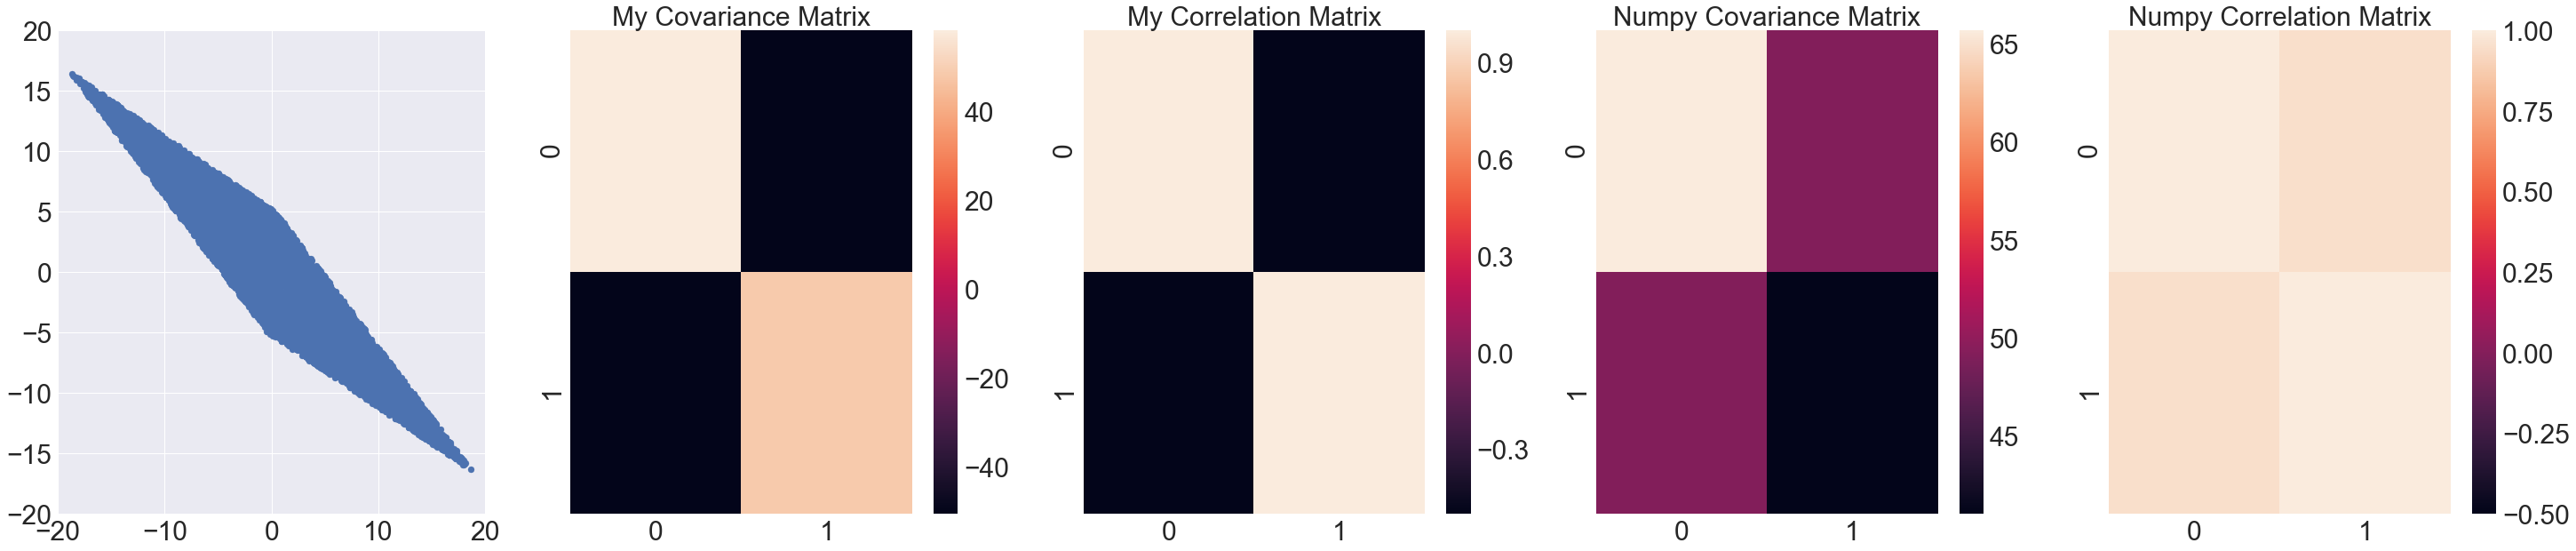

In [346]:
for _ in range(1000):
    gwtx, g_wtx = _exp(   dis_mixed @ sym_unmixing_matix    ) 
    W1 = _sym_decorrelation(np.dot(gwtx.T,dis_mixed) / dis_mixed.shape[0] - g_wtx[:,np.newaxis] * sym_unmixing_matix)
    sym_unmixing_matix = W1
    
print(sym_unmixing_matix)
dis_unmixed = dis_mixed @ sym_unmixing_matix
plt.figure(figsize=(50,10))
plt.subplot(151); plt.xlim(-20,20);plt.ylim(-20,20); plt.scatter(dis_unmixed[:,0],dis_unmixed[:,1])

dis_all = dis_unmixed
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])
sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat,vmin=-0.5);  plt.title('My Correlation Matrix',fontsize=30);

dis_all = np.hstack((dis1,dis2))
dis_mixed = dis_all @ mix_matrix
plt.subplot(154); sns.heatmap(np.cov(dis_mixed.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(dis_mixed.T),vmin=-0.5 ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

(9000, 2)
[ 1.23358114e-19 -1.11022302e-19]


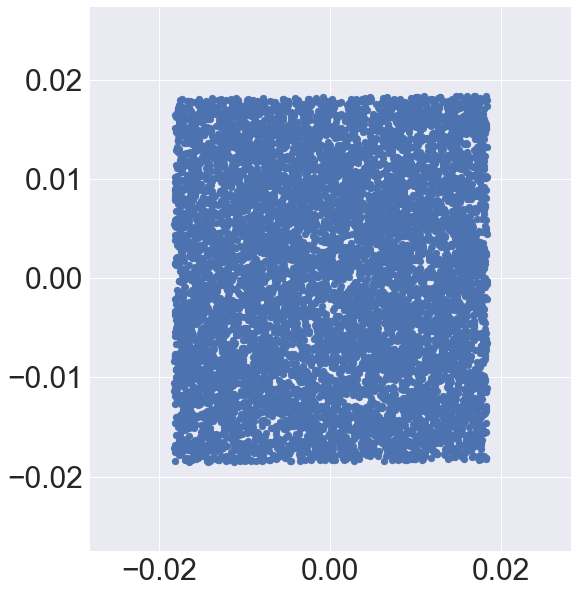

In [357]:
from sklearn.decomposition import FastICA
sk_ica = FastICA()
temp = sk_ica.fit_transform(dis_mixed)

print(temp.shape)
print(temp.mean(0))

plt.figure(figsize=(50,10))
plt.subplot(151);  plt.scatter(temp[:,0],temp[:,1])
plt.show()

In [359]:
! git all-go

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


In [ ]:
# # reference
# Holtz, Y. (2017). #92 Control color in seaborn heatmaps. The Python Graph Gallery. Retrieved 21 October 2018, from https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
# numpy.corrcoef — NumPy v1.15 Manual. (2018). Docs.scipy.org. Retrieved 21 October 2018, from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.corrcoef.html
# numpy.cov — NumPy v1.15 Manual. (2018). Docs.scipy.org. Retrieved 21 October 2018, from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cov.html#numpy.cov
# http://users.stat.umn.edu/~helwig/notes/datamat-Notes.(2018). Users.stat.umn.edu. Retrieved 21 October 2018, from http://users.stat.umn.edu/~helwig/notes/datamat-Notes.pdf
# Covariance Matrix . (2018). Stattrek.com. Retrieved 21 October 2018, from https://stattrek.com/matrix-algebra/covariance-matrix.aspx
# covariance?, H. (2018). How would you explain the difference between correlation and covariance?. Cross Validated. Retrieved 21 October 2018, from https://stats.stackexchange.com/questions/18082/how-would-you-explain-the-difference-between-correlation-and-covariance